# Homework 3: 
Madhu Kiran Chiti - 801333676 - ECGR_5105

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

from sklearn.decomposition import PCA

from sklearn.datasets import load_breast_cancer

### Problem 1: Naive Bayes Classification 


In [2]:
model = GaussianNB()
dataset = load_breast_cancer()

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, train_size = 0.8)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train, Y_train)
actual = Y_test
predictions = model.predict(X_test)

print(metrics.classification_report(actual, predictions))
print(metrics.confusion_matrix(actual, predictions))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        37
           1       0.94      0.84      0.89        77

    accuracy                           0.86       114
   macro avg       0.84      0.87      0.85       114
weighted avg       0.87      0.86      0.86       114

[[33  4]
 [12 65]]


### Problem 2: Logistic Regression with PCA feature extraction

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, train_size = 0.8)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model = LogisticRegression(random_state = 0)
K = np.arange(1, 25, 1)

accuracy = []
precision = []
recall = []

In [5]:
for i in K:
    pca = PCA(n_components = i, random_state = 0)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.fit_transform(X_test)
    
    model.fit(X_train_PCA, Y_train)
    actual = Y_test
    predictions = model.predict(X_test_PCA)
    
    accuracy.append(metrics.accuracy_score(actual, predictions))
    precision.append(metrics.precision_score(actual, predictions))
    recall.append(metrics.recall_score(actual, predictions))

Text(0.5, 1.0, 'Logistic Regression PCA Iterations Results')

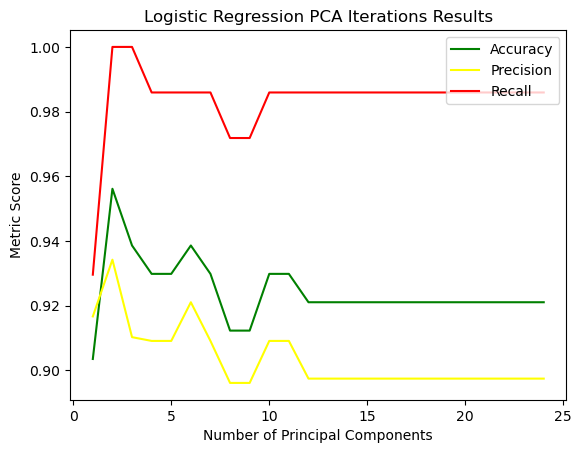

In [6]:
plt.plot(K, accuracy, color = 'green', label = 'Accuracy')
plt.plot(K, precision, color = 'yellow', label = 'Precision')
plt.plot(K, recall, color = 'red', label = 'Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Metric Score')
leg = plt.legend(loc='upper right')
plt.title('Logistic Regression PCA Iterations Results')

### Problem 3: Naive Bayes with PCA feature extraction

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, train_size = 0.8)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model = GaussianNB()
K = np.arange(1, 25, 1)

accuracy = []
precision = []
recall = []

In [8]:
for i in K:
    pca = PCA(n_components = i, random_state = 0)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.fit_transform(X_test)
    
    model.fit(X_train_PCA, Y_train)
    actual = Y_test
    predictions = model.predict(X_test_PCA)
    
    accuracy.append(metrics.accuracy_score(actual, predictions))
    precision.append(metrics.precision_score(actual, predictions))
    recall.append(metrics.recall_score(actual, predictions))

Text(0.5, 1.0, 'GaussianNB PCA Iterations Results')

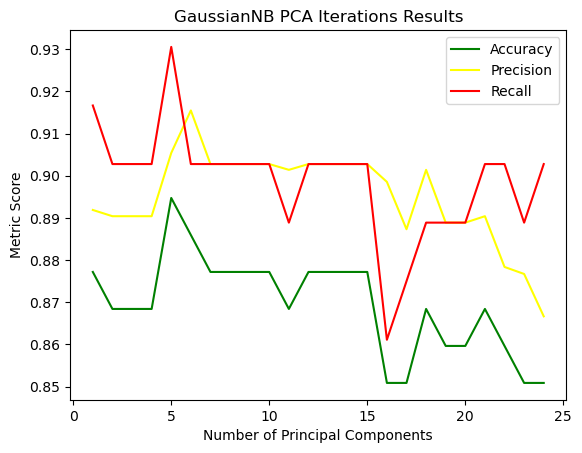

In [9]:
plt.plot(K, accuracy, color = 'green', label = 'Accuracy')
plt.plot(K, precision, color = 'yellow', label = 'Precision')
plt.plot(K, recall, color = 'red', label = 'Recall')
plt.xlabel('Number of Principal Components')
plt.ylabel('Metric Score')
leg = plt.legend(loc='upper right')
plt.title('GaussianNB PCA Iterations Results')